In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from scipy.sparse import csr_matrix
from matplotlib.lines import Line2D

In [2]:
from sklearn import cluster, metrics
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from itertools import combinations_with_replacement


In [3]:
import sys 
sys.path.append("../")
from functions.run_ica import *

In [4]:
# Data was filtered to preserve one sample type per experimental condition 
data = pd.read_csv("../data/filtered_data.csv",index_col=0)

In [5]:
# Non-standard normalization in order to preserve sparsity, as z-scores fail to execute
# due to mathematical error of dividing by zero
scaler = StandardScaler(with_mean=False)
scaler.fit(data.transpose())
norm_data = scaler.transform(data.transpose())

In [6]:
M,A = run_ica(norm_data,iterations = 10,n_comp=300)

Running iteration: 0
Number of Components: 296
Running iteration: 1
Number of Components: 294
Running iteration: 2
Number of Components: 294
Running iteration: 3
Number of Components: 294
Running iteration: 4
Number of Components: 293
Running iteration: 5
Number of Components: 292
Running iteration: 6
Number of Components: 292
Running iteration: 7
Number of Components: 292
Running iteration: 8
Number of Components: 292
Running iteration: 9
Number of Components: 290


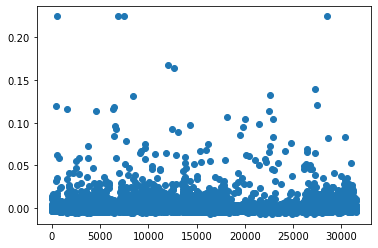

In [7]:
fig,ax = plt.subplots()
ax.plot(list(M.index),M[0],"o")

In [10]:
M.to_csv("../data/M.csv")

In [11]:
A.to_csv("../data/A.csv")